# Titulo


In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# ETL

Cargamos los datasets con los que trabajaremos

In [48]:
df = pd.read_csv('../Datasets/Penetracion-hogares.csv')
df2 = pd.read_csv('../Datasets/Penetración-poblacion.csv')

df = pd.merge(df, df2, on=['Año', 'Trimestre', 'Provincia'])

Comprobamos si contiene datos nulos o duplicados

In [49]:
print("Total de observaciones: ", df.shape[0])
print("Total de nulos: ", df.isna().sum().sum())
print("Total de duplicados", df.duplicated().sum().sum())

df.describe()

Total de observaciones:  960
Total de nulos:  0
Total de duplicados 0


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405,15.394079
std,2.873778,1.118617,23.898192,9.168959
min,2014.000000,1.000000,9.347208,2.684669
25%,2016.000000,1.750000,32.856870,8.764189
50%,2018.500000,2.500000,48.817167,13.417453
75%,2021.000000,3.250000,65.116858,19.657928
max,2023.000000,4.000000,124.061394,52.236739


No se encontran datos nulos ni duplicados. Uso el .describe() para comprobar los datos estadísticos, y no hay ningun problema.

# Outliers

Como ya verificamos que no hay datos invalidos, ahora buscaremos outliers.
En este caso verificaremos los datos de la columna `Accesos por cada 100 hab` y `Accesos por cada 100 hogares` graficando un boxplot de ambas columnas.

<Axes: >

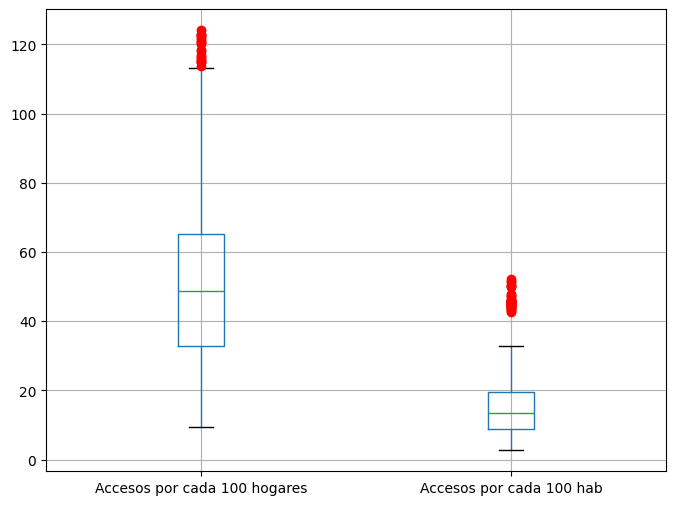

In [61]:
columns = ["Accesos por cada 100 hogares", "Accesos por cada 100 hab"]
df.boxplot(column=columns, sym='ro', figsize=(8, 6))

Usamos bloxplot para ver los datos de atipicos de manera efectiva permitiendonos la identificación de outliers para garantizar la presicion de los analisis futuros.

En el grafico podemos ver que hay varios datos atipicos y nos encargaremos de ellos. 

- Primero creamos la funcion `find_outliers` para detectar los outliers y los retorne.
- Creamos una iteracion con `for` por ejecutar la funcion con cada columna.
- Por ultimo por ultimo eliminares los outliers del dataframe.

In [ ]:
def find_outliers(df: pd.DataFrame = df, column: str = '') -> pd.DataFrame:
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)

    iqr = q3 - q1

    bot = q1 - 1.5 * iqr
    top = q1 + 1.5 * iqr
    return df[(df[column] < bot) | (df[column] > top)]

In [ ]:
total_reg = df.shape[0] 
for column in columns:
    outliers = find_outliers(column=column)
    df.drop(outliers.index, inplace=True)
    
print(f"Total de outliers encontrados: {total_reg - df.shape[0]}. De {total_reg} observaciones")